A comparison between the initial behaviours of the original and the new implementation.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import jax.numpy as jnp
from sympy import Expr

import slimpletic as st

Here we setup the parameters for the system.

In [2]:
m = 1.0
k = 1.0
ll = 1e-4 * np.sqrt(m * k)  # ll is $\lambda$ in the paper

Then the simulation parameters.

In [3]:
dt = 0.1 * np.sqrt(m / k)
t_sample_count = 10
tmax = t_sample_count * np.sqrt(m / k)
t0 = 0
t = t0 + dt * np.arange(0, t_sample_count + 1)

Now the system dynamics

In [4]:
def lagrangian_f(q, qdot, t):
    return 0.5 * m * jnp.dot(qdot, qdot) - 0.5 * k * jnp.dot(q, q) ** 2

In [5]:
from sympy import Symbol
from original import slimplectic

dho = slimplectic.GalerkinGaussLobatto('t', ['q'], ['v'])
L = 0.5 * m * np.dot(dho.v, dho.v) - 0.5 * k * np.dot(dho.q, dho.q)
# DHO:
K = -ll * np.dot(dho.vp, dho.qm)
# No damping:
K_nd = Symbol('a')
dho.discretize(L, K_nd, 0, method='implicit', verbose=False)

Now with some initial data

In [6]:
q0 = [1.]
pi0 = [0.25 * dt * k]

We get started integrating

In [7]:
o_results = dho.integrate(q0, pi0, t)
o_nr = np.vstack(
    [
        np.array(o_results[0]),
        np.array(o_results[1])
    ],
).T
o_nr

array([[ 1.        ,  0.025     ],
       [ 0.9975    , -0.074875  ],
       [ 0.985025  , -0.17400125],
       [ 0.96269975, -0.27138749],
       [ 0.9307475 , -0.36605985],
       [ 0.88948778, -0.45707161],
       [ 0.83933318, -0.54351266],
       [ 0.78078525, -0.62451858],
       [ 0.71442946, -0.69927932],
       [ 0.64092938, -0.76704726],
       [ 0.56102001, -0.82714473]])

In [8]:
st_results = st.iterate(
    lagrangian=lagrangian_f,
    q0=jnp.array(q0),
    pi0=jnp.array(pi0),
    dt=dt,
    t0=0,
    t_sample_count=t_sample_count,
    r=0
)

st_nr = np.vstack(
    [
        np.array(st_results[0]),
        np.array(st_results[1])
    ],
).T
st_nr

qi_values [[1.00624769]
 [0.99355908]]
pi_current [0.025] pi_next [-0.22496619]
qi_values [[0.98721825]
 [1.00009344]]
pi_current [0.025] pi_next [0.02872387]
qi_values [[1.00652867]
 [0.99345914]]
pi_current [0.025] pi_next [-0.22874584]
qi_values [[0.98692796]
 [1.0001896 ]]
pi_current [0.025] pi_next [0.03255952]
qi_values [[1.006818  ]
 [0.99335611]]
pi_current [0.025] pi_next [-0.23263895]
qi_values [[0.98662888]
 [1.00028857]]
pi_current [0.025] pi_next [0.03651029]
qi_values [[1.00711594]
 [0.99324991]]
pi_current [0.025] pi_next [-0.23664891]
qi_values [[0.98632074]
 [1.00039042]]
pi_current [0.025] pi_next [0.04057964]
qi_values [[1.00742274]
 [0.99314043]]
pi_current [0.025] pi_next [-0.24077924]
qi_values [[0.98600326]
 [1.00049523]]
pi_current [0.025] pi_next [0.04477112]


array([[ 1.        ,  0.025     ],
       [ 0.99355908, -0.22496619],
       [ 1.00009344,  0.02872387],
       [ 0.99345914, -0.22874584],
       [ 1.0001896 ,  0.03255952],
       [ 0.99335611, -0.23263895],
       [ 1.00028857,  0.03651029],
       [ 0.99324991, -0.23664891],
       [ 1.00039042,  0.04057964],
       [ 0.99314043, -0.24077924],
       [ 1.00049523,  0.04477112]])

In [9]:
st_nr - o_nr

array([[ 0.        ,  0.        ],
       [-0.00394092, -0.15009119],
       [ 0.01506844,  0.20272512],
       [ 0.03075939,  0.04264165],
       [ 0.0694421 ,  0.39861937],
       [ 0.10386833,  0.22443267],
       [ 0.16095539,  0.58002295],
       [ 0.21246466,  0.38786967],
       [ 0.28596096,  0.73985896],
       [ 0.35221105,  0.52626802],
       [ 0.43947522,  0.87191585]])

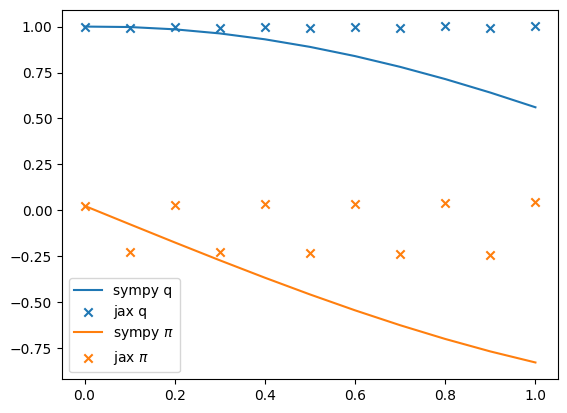

In [10]:
plt.plot(t, o_nr[:, 0], label='sympy q', color='C0')
plt.scatter(t, st_nr[:, 0], label='jax q', color='C0', marker='x')
plt.plot(t, o_nr[:, 1], label='sympy $\pi$', color='C1', )
plt.scatter(t, st_nr[:, 1], label='jax $\pi$', color='C1', marker='x')
plt.legend()